<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 4

#### Por Matías Marfisi


#### Punto 1

![Punto 1](Desarrollo/1_1.jpg "Punto 1 1")

![Punto 1](Desarrollo/1_2.jpg "Punto 1 2")

#### Punto 2

![Punto 2](Desarrollo/2_1.jpg "Punto 2 1")

![Punto 2](Desarrollo/2_2.jpg "Punto 2 2")

#### Punto 3

![Punto 3](Desarrollo/3_1.jpg "Punto 3 1")

#### Punto 4

![Punto 4](Desarrollo/4_1.jpg "Punto 4 1")

![Punto 4](Desarrollo/4_2.jpg "Punto 4 2")

#### Simulación

In [2]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

<IPython.core.display.Math object>

<IPython.core.display.Math object>

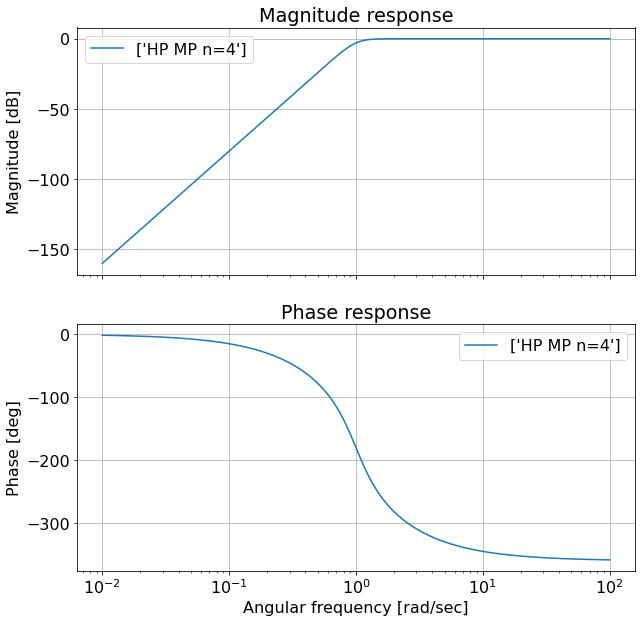

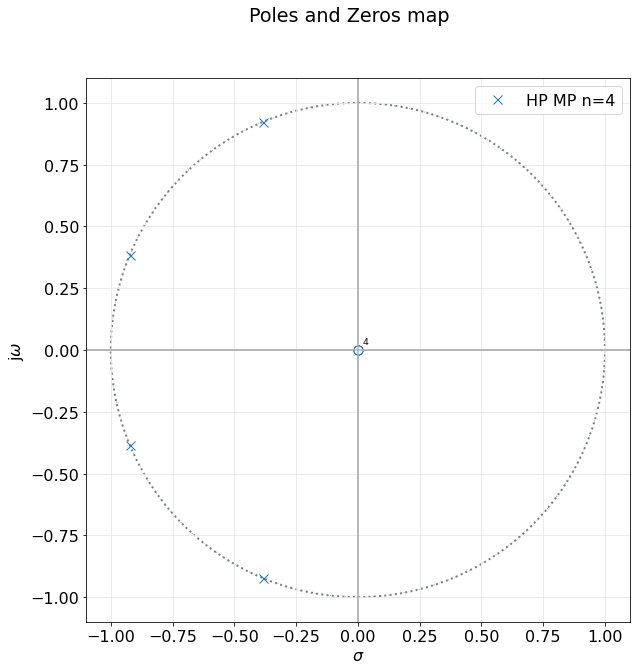

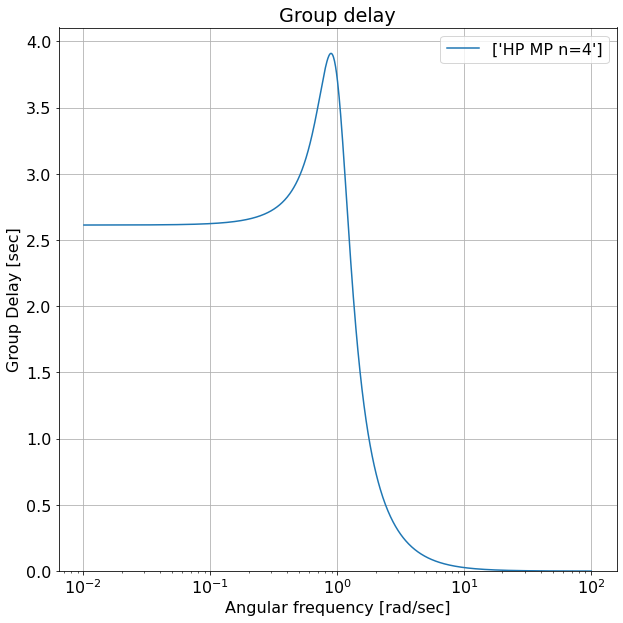

In [13]:
from splane import analyze_sys, pretty_print_bicuad_omegayq
# Comienzo Ejercicio
R1 = 1
C1 = 0.9
L1 = 1.548
R2 = 1
C2 = 2.188
L2 = 0.641

num1 = np.array([1])
den1 = np.array([1, 0.7654, 1])
num2 = np.array([1])
den2 = np.array([1, 1.8478, 1])

num3 = np.array([1, 0, 0, 0, 0])
den3 = np.array([1, 2.6131259, 3.4142136, 2.6131259, 1])

hp_max_plani = sig.TransferFunction(num3, den3)

pretty_print_bicuad_omegayq(num1,den1)
pretty_print_bicuad_omegayq(num2,den2)

plt.close('all')
analyze_sys(hp_max_plani, 'HP MP n=4')



#### Simulaciones en Spice

##### Simulación circuito normalizado

![Circuito Normalizado](Simulaciones/Circuito_Normalizado.png "Circuito Normalizado")

![Simulacion Normalizado](Simulaciones/Simulacion_Normalizado.png "Simulacion Normalizado")

##### Simulación circuito desnormalizado

![Circuito Desnormalizado](Simulaciones/Circuito_Desnormalizado.png "Circuito Desnormalizado")

![Simulacion Desnormalizado](Simulaciones/Simulacion_Desnormalizado.png "Simulacion Desnormalizado")

##### Simulación circuito con GIC para bobinas

![Circuito con GIC](Simulaciones/Circuito_GIC.png "Circuito GIC")

![Simulacion GIC](Simulaciones/Simulacion_GIC.png "Simulacion GIC")